# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [1]:
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np

In [2]:
### YOUR CODE HERE ###
#K-ближайщих соседей
df_train = pd.read_csv('train.csv')
#узнаю медианное значение
median_age = df_train.groupby('Sex').agg({'Age':['median']}).reset_index()['Age']['median']

#вычисляю индекс мужчин
male_index = df_train[(df_train['Age'].isnull()) & (df_train['Sex'] == 'male') ].index.tolist()
#заполняю возраст мужчин
df_train.iloc[male_index]['Age'].fillna(median_age[1], inplace = True)

#заполняю возраст женщин
df_train['Age'].fillna(median_age[0], inplace = True )
df_train['Cabin'].fillna('U', inplace = True)
df_train['Embarked'].fillna('U', inplace = True)


df_train['PassengerId'].isnull().sum() # пустые

df_train[(df_train['PassengerId'] >= 6)&(df_train['PassengerId'] <= 20)]

df_train['Sex'] = df_train['Sex'].apply(lambda x: int(x == 'female'))

def replace(x):
    return int((x == 'U')) * 0 + int(x == 'S') * 1 + int(x == 'C') * 2 + int(x == 'Q') * 3

df_train['Embarked'] = df_train['Embarked'].apply(lambda x: replace(x))

df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

df_train


x_train, x_test, y_train, y_test = train_test_split(df_train.iloc[::,1:],\
                                                    df_train['Survived'],\
                                                    test_size = 0.25,random_state = 17)



C:\Users\79227\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [3]:
kn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
prediction = kn.predict(x_test)

def f1(precision, recall):
    return 2 * (precision * recall)/ (precision + recall)

pr_score = precision_score(y_test.values, prediction)
recall_score = recall_score(y_test.values, prediction)

print(f1(pr_score, recall_score), pr_score/recall_score) # recall меньше

0.5521472392638037 1.295774647887324


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [4]:
from sklearn.metrics import precision_recall_fscore_support, classification_report


In [5]:
### YOUR CODE HERE ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



kn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
nb = GaussianNB().fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_train, y_train)
logreg = LogisticRegression().fit(x_train, y_train)


prediction_kn = kn.predict(x_test)
prediction_nb = nb.predict(x_test)
prediction_dtc = dtc.predict(x_test)
prediction_logreg = logreg.predict(x_test)


for i in [prediction_kn, prediction_nb, prediction_dtc, prediction_logreg]:
    print(precision_recall_fscore_support(y_test.values, i)\
          ,classification_report(y_test.values, i) )

(array([0.69078947, 0.63380282]), array([0.80152672, 0.48913043]), array([0.74204947, 0.55214724]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.69      0.80      0.74       131
           1       0.63      0.49      0.55        92

    accuracy                           0.67       223
   macro avg       0.66      0.65      0.65       223
weighted avg       0.67      0.67      0.66       223

(array([0.79856115, 0.76190476]), array([0.84732824, 0.69565217]), array([0.82222222, 0.72727273]), array([131,  92], dtype=int64))               precision    recall  f1-score   support

           0       0.80      0.85      0.82       131
           1       0.76      0.70      0.73        92

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

(array([0.80882353, 0.75862069]), array([0.83969466, 0.7173913 ]), array([0.823970

C:\Users\79227\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [15]:
### YOUR CODE HERE ###
skf = StratifiedKFold(n_splits = 5, random_state = 17)

segment = np.logspace(-1,2, 500) # (10^(-1), 10 ^(2))

lrcv = LogisticRegressionCV(Cs = segment.size,\
                            cv = skf,\
                            random_state = 17,\
                            scoring = "roc_auc").fit(x_train, y_train)

C:\Users\79227\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [16]:
prediction_lrcv = lrcv.predict(x_test)

In [17]:
prediction_lrcv

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [18]:
import matplotlib.pyplot as plt

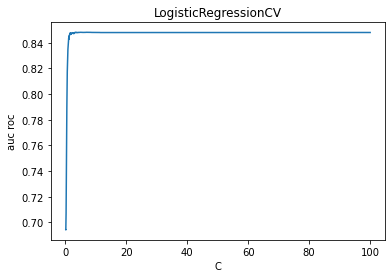

In [26]:
### YOUR CODE HERE ###


plt.plot(segment, lrcv.scores_[1].mean(axis = 0), label = 'mean')

plt.title("LogisticRegressionCV")
plt.ylabel('auc roc')
plt.xlabel('C')

plt.show()


### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [109]:
lrcv.C_, lrcv.scores_[1].mean(axis = 0)[i]

(array([1.271184]),
 array([0.69419793, 0.69429604, 0.69439013, 0.69443832, 0.69448422,
        0.69457946, 0.69462421, 0.69463167, 0.69467699, 0.6947751 ,
        0.69481583, 0.69491222, 0.69505737, 0.69539243, 0.69558233,
        0.69562823, 0.69567699, 0.69582616, 0.69586976, 0.69587263,
        0.69611015, 0.69625531, 0.69644865, 0.69678428, 0.69692886,
        0.69707114, 0.69754905, 0.69759782, 0.69778944, 0.69821859,
        0.69831153, 0.69840849, 0.69855364, 0.69879289, 0.69946472,
        0.70032473, 0.70070625, 0.70113712, 0.70142513, 0.70199885,
        0.70238095, 0.70271601, 0.70319793, 0.7038669 , 0.70434366,
        0.70467585, 0.70539357, 0.70577797, 0.70693115, 0.70731268,
        0.70837005, 0.70870625, 0.71004647, 0.710428  , 0.71090878,
        0.71205622, 0.71301205, 0.71348709, 0.7145393 , 0.71573838,
        0.71630981, 0.71712335, 0.7179868 , 0.71851406, 0.71956512,
        0.72061962, 0.72215433, 0.72363396, 0.72487722, 0.72707401,
        0.72918187, 0.730189

In [122]:
i = np.argsort(lrcv.scores_[1].mean(axis = 0))#сортирую по возрастанию
print(i[-16:-1]) # беру последние 15 точек
lrcv.scores_[1].mean(axis = 0)[i[-16:-1]] # максимальное значение повтораяется


[305 304 308 309 306 311 310 255 280 279 283 284 285 286 257]


array([0.84811417, 0.84811417, 0.84811417, 0.84811417, 0.84811417,
       0.84811417, 0.84811417, 0.84811417, 0.84811474, 0.84811474,
       0.84811532, 0.84811532, 0.84811532, 0.84811532, 0.84816179])

In [128]:
lrcv.scores_[1].mean(axis = 0)[257]

(0.8481617900172118, 0.8481617900172118)

In [123]:
print(
"""
так как у меня разбит интервал на 500 значений (-1,2) ---(10^(-1), 10^2)
то, одно значение находится на интервале (|b|-|a|)/500,
тогда 15 значений лежат на отрезке (|b|-|a|)/500 * 15,
но нам нужно выбрать лучший интервал, индекс лучшего значение равен 305,
тогда точка лежит в окрести (257 (индекс точки), (|b|-|a|)/500 * 15 )

в виде двойного неравенства:
( 257 (idx) - (|b|-|a|)/500 * 15 =< 257(idx) =< 257 (idx) +(|b|-|a|)/500 * 15 )

более коротко:
(100\500) (5 значений в одном целочисленном отрезке)

xlim(257 (idx) - 3, 257 (idx) + 3) =>


[(100/500 * 257) - 3: (100/500 * 257) + 3]

"""
)


так как у меня разбит интервал на 500 значений (-1,2) ---(10^(-1), 10^2)
то, одно значение находится на интервале (|b|-|a|)/500,
тогда 15 значений лежат на отрезке (|b|-|a|)/500 * 15,
но нам нужно выбрать лучший интервал, индекс лучшего значение равен 305,
тогда точка лежит в окрести (257 (индекс точки), (|b|-|a|)/500 * 15 )

в виде двойного неравенства:
( 257 (idx) - (|b|-|a|)/500 * 15 =< 257(idx) =< 257 (idx) +(|b|-|a|)/500 * 15 )

более коротко:
(100ŀ) (5 значений в одном целочисленном отрезке)

xlim(257 (idx) - 3, 257 (idx) + 3) =>


[(100/500 * 257) - 3: (100/500 * 257) + 3]




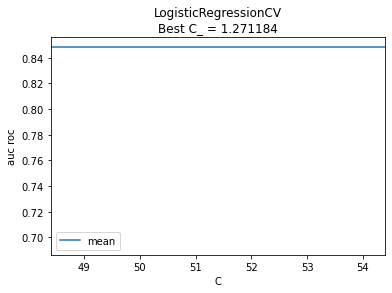

In [129]:
### YOUR CODE HERE ###

plt.plot(segment, lrcv.scores_[1].mean(axis = 0), label = 'mean')

plt.title("LogisticRegressionCV\nBest C_ = %f" % lrcv.C_)
plt.legend()
plt.ylabel('auc roc')
plt.xlabel('C')
plt.xlim([(100/500 * 257) - 3, (100/500 * 257) + 3])
#plt.xlim([0,2])
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

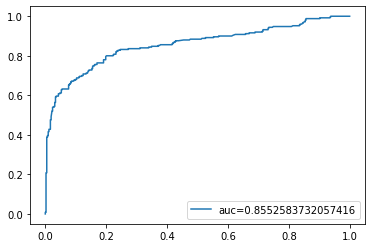

In [ ]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

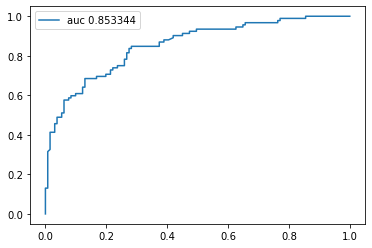

In [132]:
### YOUR CODE HERE ###
probas = lrcv.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
auc = roc_auc_score(y_test, probas[:,1])
plt.plot(fpr, tpr, label = 'auc %f' % auc)
plt.legend()
plt.show()
